# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Introduction<a id='3.1_Introduction'></a>

The general problem is to predict if a computer will be affected by a malware. In this section we delve into the exploratory data analysis to gain more insights of the data.

## 3.2 Import Libraries<a id='3.2_Import Libraries'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import pickle

In [2]:
# function to save file

def save_file(data, fname, dname):
    """Save a datafile (data) to a specific location (dname) and filename (fname)
    
    Currently valid formats are limited to CSV or PKL."""
    
    if not os.path.exists(dname):
        os.mkdir(dname)
        print(f'Directory {dname} was created.')
        
    fpath = os.path.join(dname, fname)
    
    
    if os.path.exists(fpath):
        print("A file already exists with this name.\n")

        yesno = None
        while yesno != "Y" and yesno != "N":
            yesno = input('Do you want to overwrite? (Y/N)').strip()[0].capitalize()
            if yesno == "Y":
                print(f'Writing file.  "{fpath}"')
                _save_file(data, fpath)
                break  # Not required
            elif yesno == "N":
                print('\nPlease re-run this cell with a new filename.')
                break  # Not required
            else:
                print('\nUnknown input, please enter "Y" or "N".')

    else:  # path does not exist, ok to save the file
        print(f'Writing file.  "{fpath}"')
        _save_file(data, fpath)
        
                
def _save_file(data, fpath):
    valid_ftypes = ['.csv', '.pkl']
    
    assert (fpath[-4:] in valid_ftypes), "Invalid file type.  Use '.csv' or '.pkl'"

    # Figure out what kind of file we're dealing with by name
    if fpath[-3:] == 'csv':
        data.to_csv(fpath, index=False)
    elif fpath[-3:] == 'pkl':
        with open(fpath, 'wb') as f:
            pickle.dump(data, f)

In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
dtypes = {
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

## 3.3 Load The Data<a id='3.3_Load_The_Data'></a>

In [5]:
%%time
# Read the cleaned malware data
df = pd.read_csv('../malware_cleaned_data.csv',
                    dtype = dtypes)

CPU times: user 40.6 s, sys: 1.68 s, total: 42.3 s
Wall time: 43 s


In [6]:
df = reduce_mem_usage(df)

Mem. usage decreased to 561.20 Mb (0.0% reduction)


In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 82 columns):
 #   Column                                             Non-Null Count    Dtype   
---  ------                                             --------------    -----   
 0   ProductName                                        4000000 non-null  category
 1   EngineVersion                                      4000000 non-null  category
 2   AppVersion                                         4000000 non-null  category
 3   AvSigVersion                                       4000000 non-null  category
 4   IsBeta                                             4000000 non-null  int8    
 5   RtpStateBitfield                                   3985554 non-null  float16 
 6   IsSxsPassiveMode                                   4000000 non-null  int8    
 7   DefaultBrowsersIdentifier                          194490 non-null   float16 
 8   AVProductStatesIdentifier                          3

In [8]:
df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,1.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


## 3.4 Explore The Data<a id='3.4_Explore_The_Data'></a>

#### 3.4.1. Product Names<a id='3.4.1_Product_name'></a>

In [9]:
# Defender state information 
df['ProductName'].unique()

['win8defender', 'mse', 'mseprerelease', 'windowsintune', 'fep', 'scep']
Categories (6, object): ['win8defender', 'mse', 'mseprerelease', 'windowsintune', 'fep', 'scep']

#### 3.4.2. Different OS versions<a id='3.4.2_Different_os_versions'></a>

In [10]:
df['Census_OSEdition'].unique()

['Professional', 'Core', 'CoreSingleLanguage', 'EnterpriseS', 'CoreCountrySpecific', ..., 'ServerDatacenter', 'HomePremium', 'ProfessionalSingleLanguage', 'ServerDatacenterACor', 'Pro']
Length: 30
Categories (30, object): ['Professional', 'Core', 'CoreSingleLanguage', 'EnterpriseS', ..., 'HomePremium', 'ProfessionalSingleLanguage', 'ServerDatacenterACor', 'Pro']

#### 3.4.2.1. Count of OS Versions and Product Names with Malware<a id='3.4.2.1_Count_of_os_versions_and_product_names_with_malware'></a>

In [11]:
df[df.HasDetections == 1].pivot_table('HasDetections',
                                    index='Census_OSEdition',columns='ProductName',aggfunc='count').fillna(0)

ProductName,mse,win8defender,mseprerelease,fep,scep
Census_OSEdition,,,,,
Cloud,0.0,1131.0,0.0,0.0,0.0
Core,10300.0,722738.0,5.0,1.0,3.0
CoreCountrySpecific,28.0,37212.0,0.0,0.0,0.0
CoreN,2.0,958.0,0.0,0.0,0.0
CoreSingleLanguage,498.0,460804.0,0.0,0.0,0.0
Education,2.0,9657.0,0.0,0.0,0.0
EducationN,0.0,192.0,0.0,0.0,0.0
Enterprise,0.0,8318.0,0.0,0.0,0.0
EnterpriseS,0.0,4662.0,0.0,0.0,0.0


It can be inferred from the above table that `Core` OS versions with `win8defender` were prone to malware infections with `Professional` edition next.

#### 3.4.3. Relationship between EngineVersion and Malware<a id='3.4.3_Relationship_between_engineversion_and_malware'></a>

In [12]:
pd.set_option('display.max_rows', 66)
df.groupby(['EngineVersion', 'HasDetections']).size().unstack()

HasDetections,0,1
EngineVersion,,
1.1.12805.0,646,451
1.1.12902.0,1496,907
1.1.13000.0,1174,666
1.1.13103.0,1226,748
1.1.13202.0,1365,745
1.1.13303.0,2768,1396
1.1.13407.0,2547,1483
1.1.13504.0,17916,13821
1.1.13601.0,2126,1147


`EngineVersion` prone to malware is `1.1.15100.1`

#### 3.4.4. Presence of Antivirus Protection<a id='3.4.4_Presence_of_Antivirus_Protection'></a>

In [13]:
df['IsProtected'].unique()

array([ 1.,  0., nan], dtype=float16)

In [14]:
# Replace nan with the value 2
df['IsProtected'] = df['IsProtected'].fillna(2.0) # 2 means no presence Antivirus

In [15]:
# Verify the unique values of IsProtected
df['IsProtected'].unique()

array([1., 0., 2.], dtype=float16)

In [16]:
# Data of protected devices running under win8defender
by_protection = df[df.ProductName == 'win8defender'].groupby(['IsProtected','Census_DeviceFamily',
                                            'HasDetections']).size().unstack()

In [17]:
by_protection

HasDetections                          0        1
IsProtected Census_DeviceFamily                  
0.0         Windows.Desktop       133268    81873
            Windows.Server             0        1
            Windows                    4        0
1.0         Windows.Desktop      1836514  1889845
            Windows.Server            13        4
            Windows                    3        1
2.0         Windows.Desktop         5774     3637
            Windows.Server          4177     2265
            Windows                    0        0

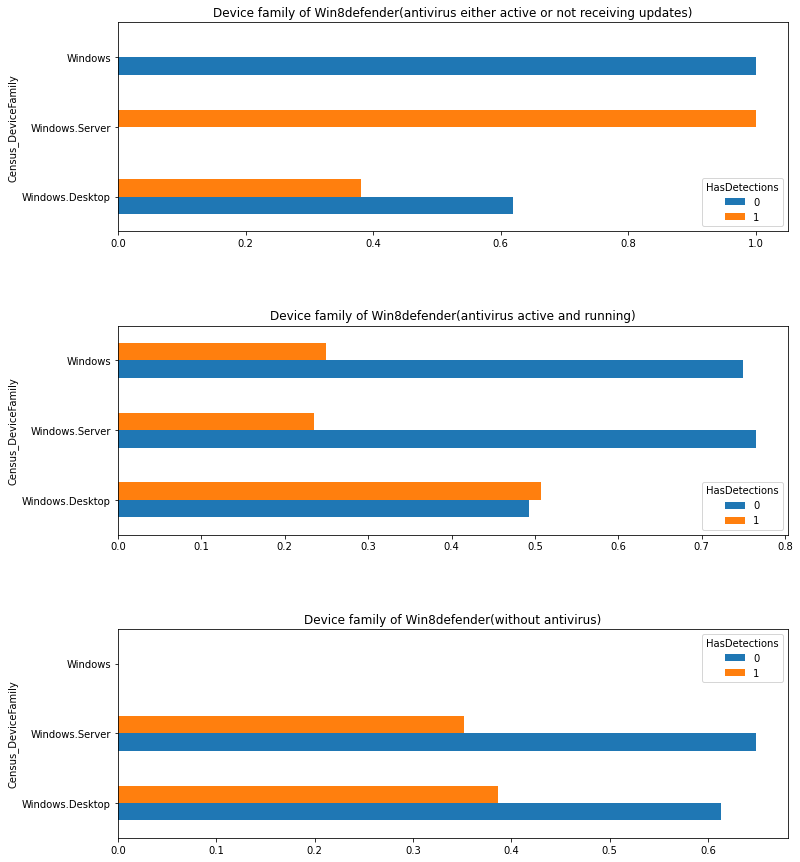

In [19]:
fig,ax = plt.subplots(3,1,figsize=(12,15))
for i in range(3):
    frame = by_protection.loc[i]
    frame = frame[frame.index.isin(frame.sum(1).index)].sort_index()
    frame = frame.div(frame.sum(1),axis=0)
    frame.plot(kind='barh',ax=ax[i])
    
ax[0].set_title('Device family of Win8defender(antivirus either active or not receiving updates)')
ax[1].set_title('Device family of Win8defender(antivirus active and running)')
ax[2].set_title('Device family of Win8defender(without antivirus)')
plt.subplots_adjust(hspace=0.45)

<b>Plot 1:</b> When a machine has an antivirus but not receiving updates, `Windows.Server` seem to be prone to malware compared to `Windows` and `Windows.Desktop` machines<br>
<b>Plot 2:</b> For devices running an active antivirus, `Windows` and `Windows.Server` seem to be less prone to malware.<br>
<b>Plot 3:</b> For devices without any antivirus, both `Windows.Server` and `Windows.Desktop` are less prone to malware.

NB: It is also worth noting the number of observations for `Windows.Server` and `Windows` are comparatively less than those `Windows.Desktop`. We need a balanced proportion to actually make an inference.

#### 3.4.5. Relationship between Firewall and Malware<a id='3.4.5_Relationship_between_firewall_and_malware'></a>

In [20]:
df['Firewall'].value_counts()

1.0    3874247
0.0      84745
Name: Firewall, dtype: int64

In [21]:
df[df.ProductName == 'win8defender'].groupby(['Firewall','HasDetections']).size().unstack()

HasDetections,0,1
Firewall,,
0.0,43001,41401
1.0,1933913,1934053


Having a firewall doesn't have any effect on the machine getting affected by malware

#### 3.4.6. Relationship between OSEdition, Firewall and Malware<a id='3.4.6_Relationship_between_osedition_firewall_and_malware'></a>

In [22]:
# Dataset of devices running under win8defender and has a firewall
firewall_def = df[(df.ProductName == 'win8defender') & (df.Firewall == 1)]

In [23]:
firewall_def.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,1.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [24]:
firewall_def['Census_OSEdition'].value_counts()

Core                           1514173
Professional                   1338225
CoreSingleLanguage              854879
CoreCountrySpecific              71803
ProfessionalEducation            25020
Education                        17840
Enterprise                       15259
ProfessionalN                    12373
EnterpriseS                       8194
ServerStandard                    2889
Cloud                             2796
CoreN                             2074
ServerStandardEval                 852
EducationN                         387
EnterpriseSN                       375
ServerDatacenterEval               299
ServerSolution                     196
EnterpriseN                        161
ProfessionalEducationN              92
ProfessionalWorkstation             57
ServerDatacenter                     6
ProfessionalWorkstationN             6
CloudN                               4
ProfessionalCountrySpecific          2
ProfessionalSingleLanguage           1
HomePremium              

Among the OSEditions built on `win8defender`, Microsoft `Core` devices had the most built in firewalls, followed by Microsoft `Professional`. Microsoft `Ultimate` and `ServerDatacenterACor` had no firewalls.

#### 3.4.6.1 OS Editions<a id='3.4.6.1_OS_Editions'></a>

In [25]:
by_OSEdition = firewall_def.groupby(['Census_OSEdition','HasDetections']).size().unstack()

In [26]:
by_OSEdition

HasDetections,0,1
Census_OSEdition,,
Cloud,1671,1125
Core,800608,713565
CoreCountrySpecific,35894,35909
CoreN,1139,935
CoreSingleLanguage,402922,451957
Education,8339,9501
EducationN,206,181
Enterprise,7281,7978
EnterpriseS,3787,4407


Again we see no distinction between malware prone and non prone devices when it comes to OS Editions even with firewall enabled.

#### 3.4.6.2 Device Family<a id='3.4.6.2_Device Family'></a>

In [27]:
device_family = firewall_def.groupby(['Census_DeviceFamily','HasDetections']).size().unstack()

In [28]:
device_family = device_family.div(device_family.sum(1),axis=0)
device_family

HasDetections,0,1
Census_DeviceFamily,,
Windows.Desktop,0.499797,0.500203
Windows.Server,0.667295,0.332705
Windows,0.875000,0.125000


<AxesSubplot:title={'center':'Machines Prone to malwares by Device Family '}, ylabel='Census_DeviceFamily'>

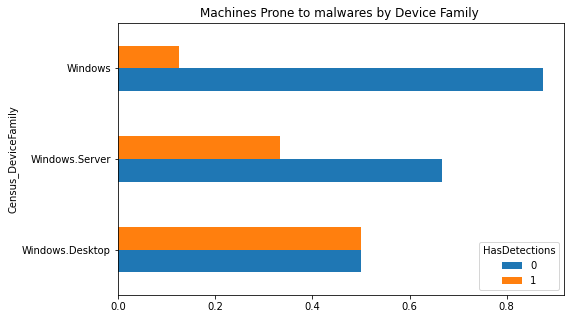

In [29]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
device_family.plot(ax=ax,kind='barh',title='Machines Prone to malwares by Device Family ')

With firewall enabled, more `Windows` devices are less prone to malware infections. But That is not the case with `Windows.Desktop` machines, 50% are prone to malware infections and 50% of them are not.

#### 3.4.7 Secure Boot Enabled<a id='3.4.7_Secure_Boot_Enabled'></a>

In [30]:
df[df.ProductName == 'win8defender'].Census_IsSecureBootEnabled.value_counts(normalize=True)

0    0.509156
1    0.490844
Name: Census_IsSecureBootEnabled, dtype: float64

(From Microsoft)Secure boot is a security standard developed by members of the PC industry to help make sure that a device boots using only software that is trusted by the Original Equipment Manufacturer (OEM). When the PC starts, the firmware checks the signature of each piece of boot software, including UEFI firmware drivers (also known as Option ROMs), EFI applications, and the operating system. If the signatures are valid, the PC boots, and the firmware gives control to the operating system.<br>[Source](https://docs.microsoft.com/en-us/mem/intune/user-help/you-need-to-enable-secure-boot-windows)

It appears there is a break up between the two groups.

In [31]:
secure_boot = df[df.ProductName == 'win8defender'].groupby(['Census_IsSecureBootEnabled'
                                                          ,'HasDetections']).size().unstack()

In [32]:
secure_boot = secure_boot.div(secure_boot.sum(1),axis=0)
secure_boot

HasDetections,0,1
Census_IsSecureBootEnabled,,
0,0.499156,0.500844
1,0.501423,0.498577


<AxesSubplot:ylabel='Census_IsSecureBootEnabled'>

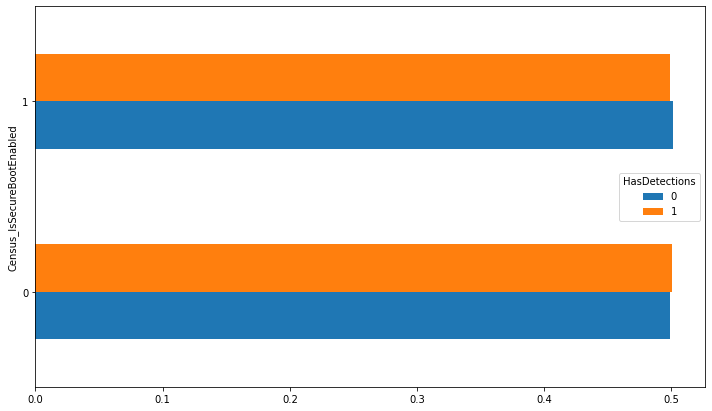

In [33]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
secure_boot.plot(kind='barh',ax=ax)

When secure boot is enabled, more devices are less prone to malware, when secure boot is not enabled the devices are prone to malware. There isn't muct significance though, it appears there's a break up between these two groups somehow.

#### 3.4.8 Auto Update and Malware<a id='3.4.8_Auto_Update_And_Malware'></a>

In [34]:
df['Census_OSWUAutoUpdateOptionsName'].value_counts()

FullAuto                                 1773160
UNKNOWN                                  1130053
Notify                                    911746
AutoInstallAndRebootAtMaintenanceTime     166661
Off                                        11938
DownloadNotify                              6442
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64

In [35]:
auto_update = df[df.ProductName == 'win8defender'].groupby(['Census_OSWUAutoUpdateOptionsName'
                                                          ,'HasDetections']).size().unstack()

In [36]:
auto_update = auto_update.div(auto_update.sum(1),axis=0)
auto_update

HasDetections,0,1
Census_OSWUAutoUpdateOptionsName,,
AutoInstallAndRebootAtMaintenanceTime,0.513755,0.486245
DownloadNotify,0.648401,0.351599
FullAuto,0.483461,0.516539
Notify,0.524777,0.475223
Off,0.527533,0.472467
UNKNOWN,0.503289,0.496711


<AxesSubplot:ylabel='Census_OSWUAutoUpdateOptionsName'>

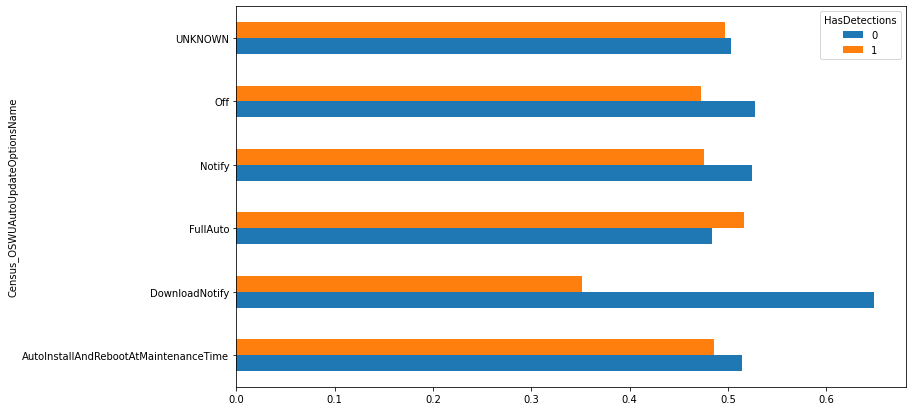

In [37]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
auto_update.plot(kind='barh', ax=ax)

Again we really don't see a significant difference between these auto update options. `DowmloadNotify` seems to be doing well though when it comes malware infections. When the option was set to `DownloadNotify` 63% of the devices did not get infected with a malware.

#### 3.5. Distribution of Numerical Features<a id='3.5._Distributionofnumericalfeatures'></a>

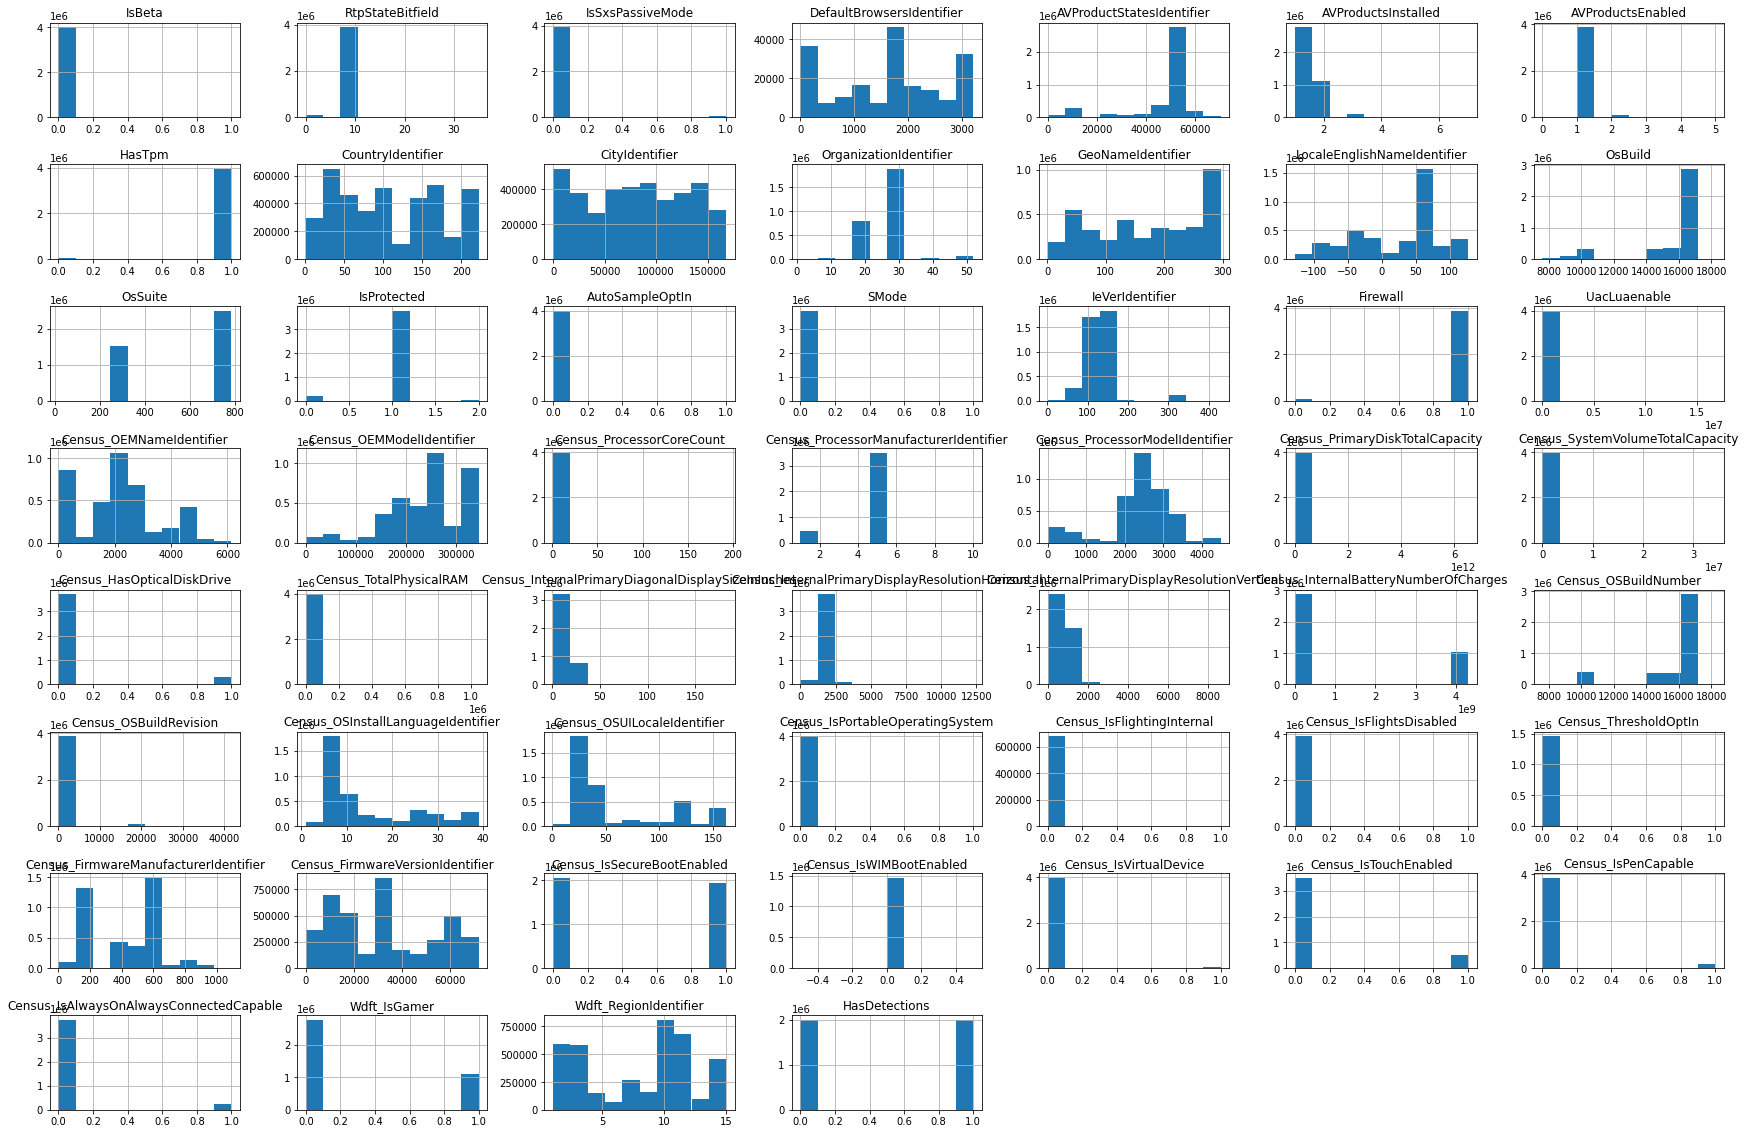

In [38]:
# Distribution of feature values
df.hist(figsize=(30,20))
plt.subplots_adjust(hspace=0.5);

#### 3.5.1. Feature Correlation Heatmap<a id='3.5._Feature_Correlation_Heatmap'></a>

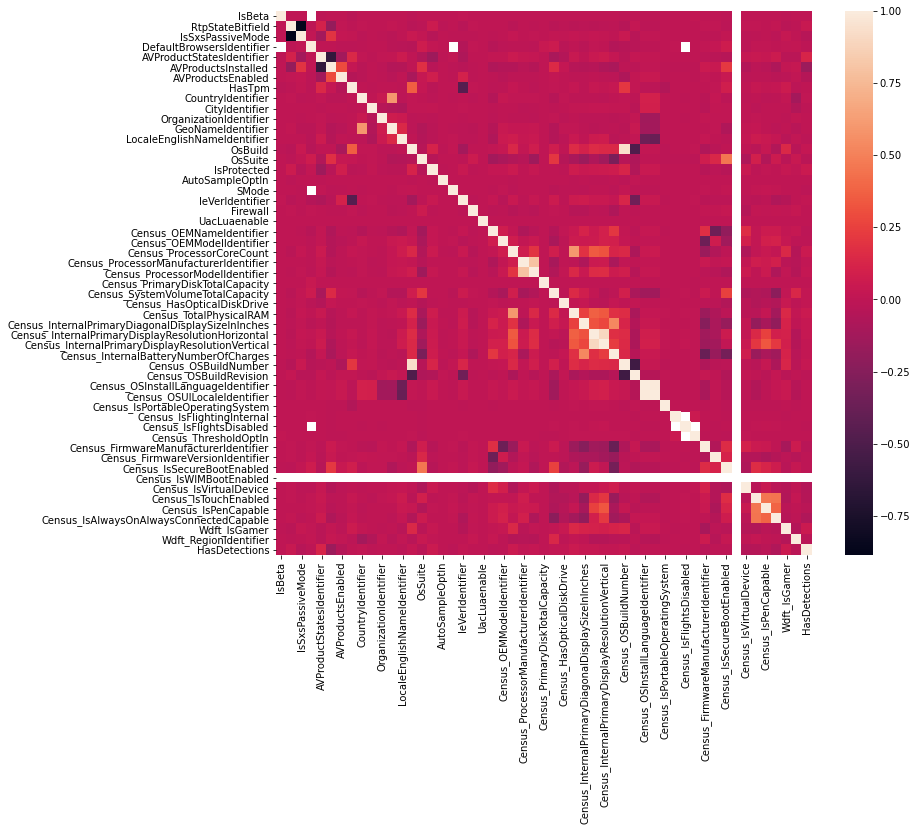

In [39]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

#### 3.6. Drop Columns<a id='3.6._Drop Columns'></a>

In [40]:
# Drop columns with missing values using a threshold
# Drop any column with more than 90% missing values
threshold = len(df) * 0.10
df = df.dropna(thresh=threshold, axis=1)

In [41]:
# function to calculate percentage of missing values
# for each column
def missing_values_pct(df):
    pd.options.display.max_rows = 100 # number of rows to print since we have more columns
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns = ['count', '%']
    sorted_ms = missing.sort_values(by='%', ascending=False)
    return sorted_ms

In [42]:
missing_values_pct(df)

,count,%
Census_IsFlightingInternal,3321519,83.037975
Census_InternalBatteryType,2841069,71.026725
Census_ThresholdOptIn,2539963,63.499075
Census_IsWIMBootEnabled,2536560,63.414000
SmartScreen,1424863,35.621575
OrganizationIdentifier,1233574,30.839350
SMode,241038,6.025950
CityIdentifier,146184,3.654600
Wdft_RegionIdentifier,135894,3.397350
Wdft_IsGamer,135894,3.397350


In [ ]:
# save the data to a new csv file
datapath = '.../Capstone Project2/'
save_file(df, 'malware_step3.csv', datapath)